## <center>   Assignment </center>

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st

In [3]:
rta = pd.read_excel('Assignment_Batch7_stats.xlsx', skiprows=18)
rta.drop(columns=['Unnamed: 11','Unnamed: 12'], inplace = True)

In [5]:
rta.tail()

,Serial number,Age (yrs),Gender,Occupation,Site of death,Time of death,"Alco,Drug etc",Use of helmet,Type of vehicle,Period of coma (hrs),Person died
45,46,32,Male,Student,Spot,Immediately,Yes,No,RX 100,NaN,Rider
46,47,42,Male,Employee,Spot,Immediately,Yes,No,Scooty,NaN,Rider
47,48,23,Male,Mechanic,Spot,Immediately,Yes,No,Scooter,NaN,Rider
48,49,5,Female,Student,On the way,Immediately,No,No,RX 100,NaN,Pillion
49,50,25,Male,Student,On the way,Immediately,Yes,No,RX 100,NaN,Rider


### 1. How many children (<= 18 years) have died in the accident and how many of them are males and females?

In [104]:
rta[rta['Age (yrs)'] <= 18]['Gender'].value_counts()

Male      6
Female    2
Name: Gender, dtype: int64

### 2. How many children had taken alcohol? Were they riders or pillion when they died?

In [17]:
print(rta[(rta['Alco,Drug etc']== 'Yes') & (rta['Age (yrs)'] <= 18)]['Serial number'].count(),'children had taken alcohol')
print(rta[(rta['Alco,Drug etc']== 'Yes')&(rta['Age (yrs)'] <= 18)]['Person died'].value_counts())


3 children had taken alcohol
Pillion    2
Rider      1
Name: Person died, dtype: int64


### 3. How many children have died immediately in the accident as pillion riders who had consumed alcolhol? 

In [88]:
rta[(rta['Time of death']=='Immediately') & (rta['Person died'] == 'Pillion') & (rta['Alco,Drug etc']== 'Yes') & (rta['Age (yrs)'] <= 18)]['Site of death'].count()

2

### 4. How many have died under the influence of alcohol/drug and without wearing helmet?


In [34]:
rta[(rta['Alco,Drug etc']== 'Yes') & (rta['Use of helmet']=='No')]['Gender'].count()


19

### 5. How many of them have died between the age group of 31 - 40 years inspite of wearing helmet?

In [7]:
rta[((rta['Age (yrs)']>=31 ) & (rta['Age (yrs)'] <= 40 )) & (rta['Use of helmet'] == 'Yes')]['Age (yrs)'].count()


2

### 6. What is the ratio of male and female who died on the spot?

In [58]:
male = rta[(rta['Gender'] == 'Male') & (rta['Site of death'] == 'Spot')]['Gender'].count()
female = rta[(rta['Gender'] == 'Female') & (rta['Site of death'] == 'Spot')]['Gender'].count()

In [59]:
df = pd.DataFrame()
df['Gender']=['Male','Female']
df['Count'] = [male,female]
df

,Gender,Count
0,Male,14
1,Female,5


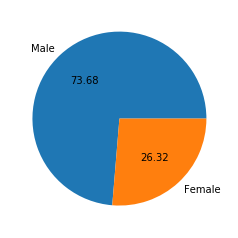

In [71]:
from matplotlib import pyplot as plt
plt.pie(df.Count, labels=df.Gender, autopct = '%.2f')
plt.show()

### 7. Whai is the medianal survival time  and IQR of RTA victims who died in the hospital?


In [16]:
tmofsrvl= rta[rta['Site of death']== 'Hospital']['Time of death']
time=[]

In [17]:
import re
for i in tmofsrvl:
    if len(re.findall('\d.*[^\S]',i))>0:
        time.append(int(re.findall('\d.*[^\S]',i)[0]))
    else:
        time.append(0)

In [31]:
import numpy as np
print('medianal survival time is:',np.median(sorted(time)))

medianal survival time is: 72.0


In [41]:
ðdf = pd.DataFrame(time)

In [42]:
print('IQR of RTA victims who died in the hospital is:',(df.quantile(.75)- df.quantile(.25))[0])

IQR of RTA victims who died in the hospital is: 139.0


### 8. How many of them have died in the hospital for whom wearing of helmet details not available? Do you think these people could have wore helmet at the time of accident?

In [8]:
rta[(rta['Use of helmet'] == 'Na')& (rta['Site of death']=='Hospital')]['Gender'].count()

6

In [11]:
yes= rta[rta['Use of helmet']== 'Yes']['Gender'].count()
no= rta[rta['Use of helmet']== 'No']['Gender'].count()
probability_of_yes = yes/(yes+no) 
probability_of_no = no/(yes+no)
print('Probability of wearing helmet is ', probability_of_yes)
print('Probability of not wearing helmet is', probability_of_no)

Probability of wearing helmet is  0.075
Probability of not wearing helmet is 0.925


So we can conclude that these people could not wear helmet at the time of accident because the probability of not wearing helmet is more higher than th probability of wearing the helmet

### 9. What is the medianal period of coma (hrs) and IQR of RTA victims who died in the hospital?

In [32]:
tmofsrvl= rta[rta['Site of death']== 'Hospital']['Period of coma (hrs)']

In [33]:
tmofsrvl=tmofsrvl.fillna(0)

In [37]:
print('medianal period of coma (hrs) is:',np.median(tmofsrvl.sort_values()))

medianal period of coma (hrs) is: 72.0


In [14]:
print('IQR of RTA victims',tmofsrvl.quantile(.75)-tmofsrvl.quantile(.25))

IQR of RTA victims 139.0


### 10. What is the ratio of students to bussinessmen who died in RTA under the influence of alcohol?

In [45]:
businessman=rta[(rta.Occupation == 'Bussinesman') & (rta['Alco,Drug etc']== 'Yes')]['Occupation'].count()
student = rta[(rta.Occupation == 'Student')& (rta['Alco,Drug etc']== 'Yes')]['Occupation'].count()

In [46]:
df = pd.DataFrame()
df['Occupation']=['Businessman','Student']
df['Count'] = [businessman, student]
df

,Occupation,Count
0,Businessman,5
1,Student,6


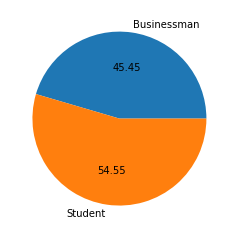

In [47]:
plt.pie(df.Count, labels=df.Occupation, autopct = '%.2f')
plt.show()

### 11. State some of the hypothesis which may be formulated based on this data?  And test these hypothesis?

in all the tests our alpha value is .05 with 95% of confidence level

In [19]:
#H0: age of the people consuming Alcohol and drugs and the age of people not consuming Alcohol and drugs having no difference
#H1: age of the people consuming Alcohol and drugs and the age of people not consuming Alcohol and drugs having difference

In [112]:
age1=[]
age2=[]
for i in rta[rta['Alco,Drug etc']== 'Yes']['Age (yrs)'][:23]:
    age1.append(i)
for j in rta[rta['Alco,Drug etc'] == 'No']['Age (yrs)'][:23]:
    age2.append(j)


In [113]:
df = pd.DataFrame(age1, age2)

In [114]:
df.reset_index(inplace=True)

In [115]:
df.columns=['Yes', 'No']

In [116]:
tstat,pval = st.ttest_rel(df.Yes,df.No)
print(tstat,pval)

0.41027938902332955 0.6855691369619543


here p value is greater than the alpha value then the null hypothesis is accepted

In [117]:
#H0: Use of helmet has impact on the site of death
#H1: use of helemt has no impact on the site of death
df2= pd.crosstab(rta['Site of death'], rta['Use of helmet']).drop(columns=['Na'])
st.chi2_contingency(df2)

(0.692271218587008, 0.707416548343221, 2, array([[17.575,  1.425],
        [ 4.625,  0.375],
        [14.8  ,  1.2  ]]))

here our p value is more than alpha value so the null hypothesis is accepted

In [ ]:
#H0 : Age has no impact on the use of helmet
#H1: Age has impact on the use of helmet

In [119]:
da=rta[rta['Use of helmet']!='Na']
df3 = pd.crosstab(da['Age (yrs)'], da['Use of helmet'])
chi,p,dof,arr=st.chi2_contingency(val)
p

0.37613740355443037

Here p value is higher than alpha value so null hypothesis accepted

In [120]:
# H0: rider&pillion death are dependent of alchol
# H1: riders & pillion are independent of alcohol

df4=pd.crosstab(rta['Person died'],rta['Alco,Drug etc'])
st.chi2_contingency(df4)

(1.4929738359690055, 0.47402893351244424, 2, array([[ 7.02,  5.98],
        [19.44, 16.56],
        [ 0.54,  0.46]]))

Here our p value is higher than alpha so the null hypothesis is not accepted

In [ ]:
#H0: Age has impact on Alcohol consumtion 
#H1: Age has no impact on Alcohol consumption

In [121]:
df5=pd.crosstab(rta['Age (yrs)'], rta['Alco,Drug etc'])
chi, p, dof, arr=st.chi2_contingency(df5)
p

0.37613740355443037

Here the p value is higher than the alpha value so accpet the null hypothesis

 ### 12. Is there sufficient data to test these hypothesis? If so use the available and test those hypothesis. 				
 Ans. No there is not sufficient data to test the hypothesis, we cant perform any parametric test on the data

### 13. Use appropriaate graphs to present the data?

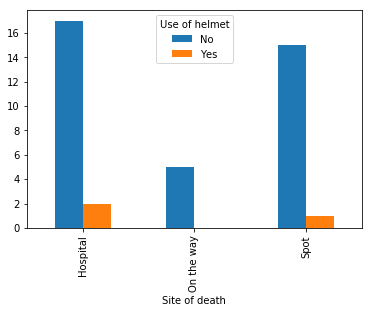

In [123]:
df2.plot(kind='bar')

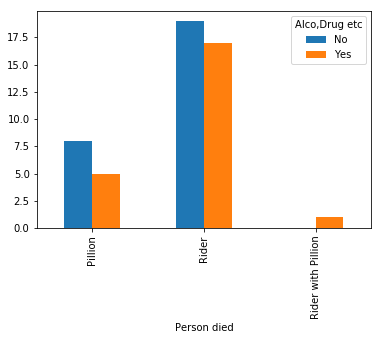

In [129]:
df4.plot(kind='bar')

(array([ 4.,  4., 13.,  4., 10.,  8.,  1.,  3.,  2.,  1.]),
 array([ 5. , 11.7, 18.4, 25.1, 31.8, 38.5, 45.2, 51.9, 58.6, 65.3, 72. ]),
 <a list of 10 Patch objects>)

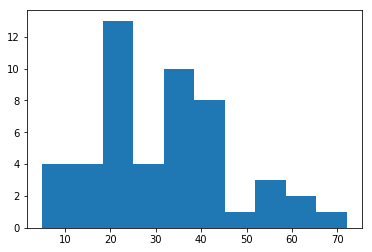

In [131]:
plt.hist(rta['Age (yrs)']) ##checking if age is normally distributed or not

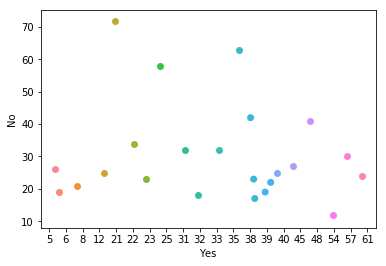

In [147]:
import seaborn as sns
sns.stripplot(df.Yes.sort_values(), df.No.sort_values() ,jitter = 0.5, size= 7)
plt.show()
#checking the relation between the ages taking alcohol and not taking alcohol

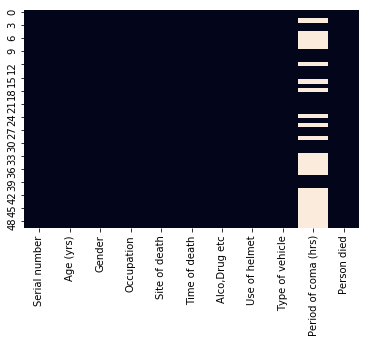

In [148]:
#checking the Null values
sns.heatmap(rta.isnull(),cbar=False)

In [168]:
## using which vehicle more people died
k=rta.groupby('Type of vehicle').count().sort_values('Serial number').reset_index()

<BarContainer object of 8 artists>

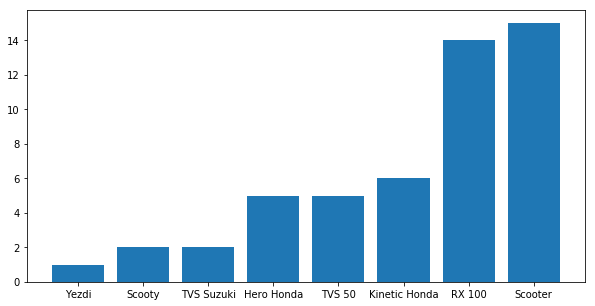

In [174]:
plt.figure(figsize=(10,5))
plt.bar(k['Type of vehicle'],k['Gender'])

<BarContainer object of 3 artists>

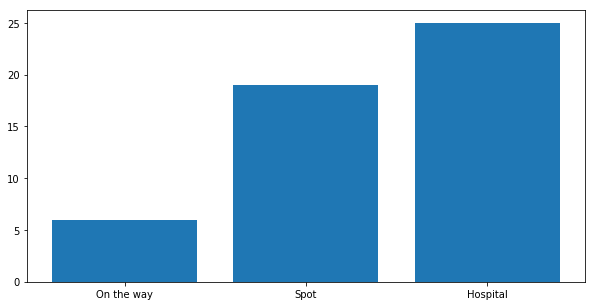

In [178]:
## what site is having more death
dr=rta.groupby('Site of death').count().sort_values('Serial number').reset_index()
plt.figure(figsize=(10,5))
plt.bar(dr['Site of death'],dr['Gender'])

### 14. What are the different types of vehicles used?


In [20]:
rta['Type of vehicle'].unique()


array(['Scooter', 'Scooty', 'Kinetic Honda', 'RX 100', 'Hero Honda',
       'TVS Suzuki', 'Yezdi', 'TVS 50'], dtype=object)

### 15. Considering 0 for survival of Rider and 1 for death fit a Logistic regression model for the data by treating all other variables has explanatory variables
